In [1]:
## Import libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\LENOVO\ML_SUMMATIVE\African_Smart_Crop_Yield_2024.csv")
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North Africa,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,1/8/2024,5/9/2024,122,4408.07,SENS0001,3/19/2024,14.970941,82.997689,0.63,Mild
1,FARM0002,South Africa,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2/4/2024,5/26/2024,112,5389.98,SENS0002,4/21/2024,16.613022,70.869009,0.58,NaN
2,FARM0003,South Africa,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2/3/2024,6/26/2024,144,2931.16,SENS0003,2/28/2024,19.503156,79.068206,0.80,Mild
3,FARM0004,Central Africa,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2/21/2024,7/4/2024,134,4227.80,SENS0004,5/14/2024,31.071298,85.519998,0.44,NaN
4,FARM0005,Central Africa,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2/5/2024,5/20/2024,105,4979.96,SENS0005,4/13/2024,16.568540,81.691720,0.84,Severe


In [3]:
# Drop irrelevant columns
df.drop(columns=["farm_id", "sensor_id", "timestamp", "sowing_date", "harvest_date",
                 "latitude", "longitude", "region"], inplace=True)

In [4]:
df

,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,fertilizer_type,pesticide_usage_ml,total_days,yield_kg_per_hectare,NDVI_index,crop_disease_status
0,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organic,6.34,122,4408.07,0.63,Mild
1,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,Inorganic,9.60,112,5389.98,0.58,NaN
2,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,Mixed,15.26,144,2931.16,0.80,Mild
3,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,Organic,25.80,134,4227.80,0.44,NaN
4,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,Mixed,25.65,105,4979.96,0.84,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Rice,42.85,6.70,30.85,52.35,79.58,7.25,Manual,Mixed,8.82,138,4251.40,0.59,Mild
496,Soybean,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organic,5.05,104,3708.54,0.85,Severe
497,Cotton,15.93,5.72,17.03,288.96,57.87,7.69,Drip,Inorganic,46.55,128,2604.41,0.71,Mild
498,Soybean,38.61,6.20,17.08,279.06,73.09,9.60,Drip,Organic,43.78,131,2586.36,0.77,Severe


In [5]:
# Encode categorical features
label_encoders = {}
for col in ["crop_type", "irrigation_type", "fertilizer_type", "crop_disease_status"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save encoders
joblib.dump(label_encoders, "encoders.pkl")

# Separate features and target
X = df.drop("yield_kg_per_hectare", axis=1)
y = df["yield_kg_per_hectare"]

In [6]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression (Gradient Descent)
lin_reg = SGDRegressor(max_iter=1000, learning_rate='optimal')
train_losses = []
test_losses = []

for _ in range(100):
    lin_reg.partial_fit(X_train, y_train)
    train_losses.append(mean_squared_error(y_train, lin_reg.predict(X_train)))
    test_losses.append(mean_squared_error(y_test, lin_reg.predict(X_test)))

# Decision Tree
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

# Evaluate models
models = {
    "Linear Regression": lin_reg,
    "Decision Tree": dt_reg,
    "Random Forest": rf_reg
}

for name, model in models.items():
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} RMSE: {np.sqrt(mse):.2f}")

Linear Regression RMSE: 1885299911473.40
Decision Tree RMSE: 1630.55
Random Forest RMSE: 1222.01


In [7]:
# Save best model
best_model = min(models.items(), key=lambda x: mean_squared_error(y_test, x[1].predict(X_test)))
joblib.dump(best_model[1], "best_model.pkl")
print(f"Best model saved: {best_model[0]}")

Best model saved: Random Forest


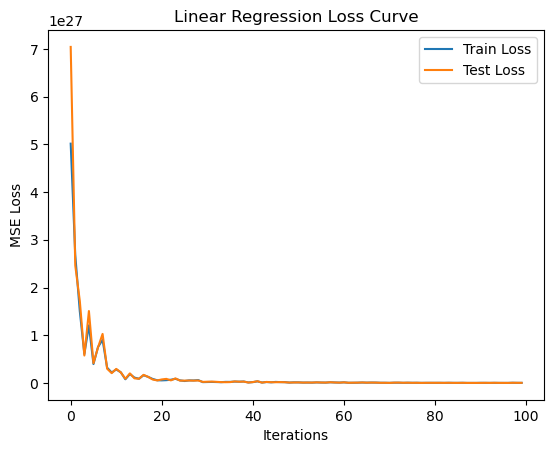

In [8]:
# Plot loss curves
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Linear Regression Loss Curve")
plt.legend()
plt.savefig("loss_curve.png")
plt.show()

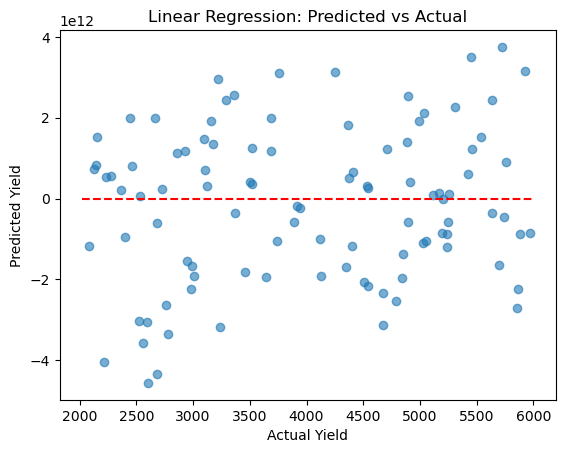

In [9]:
# Final scatter plot (LR only)
plt.scatter(y_test, lin_reg.predict(X_test), alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression: Predicted vs Actual")
plt.savefig("scatter_plot.png")
plt.show()

In [11]:
## testing my endpointabs
import requests
url = "https://cropvision.onrender.com/predict"
payload = {
    "soil_moisture": 45.2,
    "soil_pH": 6.5,
    "temperature": 23.0,
    "rainfall": 120.0,
    "humidity": 78.0,
    "sunlight_hours": 6.0,
    "irrigation_type": 1,
    "fertilizer_type": 2,
    "pesticide_usage": 0.4,
    "total_days": 90,
    "NDVI_index": 0.75,
    "crop_type": 3,
    "crop_disease_status": 0
}
response = requests.post(url, json=payload)
print(response.json())

{'predicted_yield_kg_per_hectare': 4006.71}
